In [1]:
import re
import pickle
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from unidecode import unidecode
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [29]:
def find_from(line):
    global LAURA_IDENTIFIER, JUAN_IDENTIFIER, LAURA_IDENTIFIER_LENGTH, JUAN_IDENTIFIER_LENGTH
    if LAURA_IDENTIFIER in line:
            from_ = "Laura"
            index = line.find(LAURA_IDENTIFIER) + LAURA_IDENTIFIER_LENGTH
    else:
        from_ = "Juan"
        index = line.find(JUAN_IDENTIFIER) + JUAN_IDENTIFIER_LENGTH
    if '<Media omitted>' in line:
        return from_, ''
    return from_, line[index:].replace('\n', '')

def split_messages(lines):
    messages = {'Laura': [], 'Juan': []}
    for line in lines:
        from_, text = find_from(line)
        messages[from_].append(text)
    return messages

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def get_frequency_dict(text, replace_ja=True, decode=True):
    def uniform(text):
        utext = unidecode(text)
        if not utext:
            utext = text
        return utext
    
    if replace_ja:
        text = re.sub('(ja){1,}', 'jajaja', text)
    if decode:
        words = [uniform(word) for word in text.split(' ')]
    else:
        words = text.split(' ')
    counts = Counter(words)
    counts = pd.Series(list(counts.values()), index=list(counts.keys()))
    counts = counts[~counts.index.isin(stopwords)]
    
    return dict(counts.sort_values(ascending=False))

def open_wordcloud(name):
    with open('wordcloud_%s.pkl' % name, 'rb') as file:
        return pickle.load(file)
    
def save_wordcloud(name, wordcloud):
    with open('wordcloud_%s.pkl' % name, 'wb') as file:
        return pickle.dump(wordcloud, file)

In [3]:
with open('quiero cantarte.txt') as file:
    song = "".join(file.readlines())

with open("WhatsApp Chat.txt") as file:
    whatsapp = file.readlines()
    
with open('stopwords.txt') as file:
    stopwords = list(set("".join(file.readlines()).split('\n')))

In [8]:
LAURA_IDENTIFIER = "Meñeñotes 😽: "
LAURA_IDENTIFIER_LENGTH = len(LAURA_IDENTIFIER)

JUAN_IDENTIFIER = "Juan Barbosa: "
JUAN_IDENTIFIER_LENGTH = len(JUAN_IDENTIFIER)

YINYANG = np.array(Image.open("yinyang.jpeg"))
YINYANG_LEFT = np.array(Image.open("yinyang_left.jpeg"))
YINYANG_RIGHT = np.array(Image.open("yinyang_right.jpeg"))

HEART = np.array(Image.open("heart.jpg"))

height, width = YINYANG_LEFT.shape[:2]

In [6]:
messages = split_messages(whatsapp)

In [7]:
for from_ in messages:
    print("%s: %d messages" % (from_, len(messages[from_])))

Laura: 20806 messages
Juan: 19418 messages


# WordClouds

In [8]:
laura = ' '.join(messages['Laura']).lower()
juan = ' '.join(messages['Juan']).lower()

laura_dict = get_frequency_dict(laura)
juan_dict = get_frequency_dict(juan)

In [10]:
wordcloud_kwargs = {
    'background_color': "white",
    'max_words': 1000,
    'min_font_size': 12,
    'mode': 'RGB',
    'width': width,
    'height': height,
    'random_state': 14,
    'font_path': 'symbola/Symbola.ttf'
}

# wordcloud_laura = WordCloud(mask=YINYANG_LEFT, **wordcloud_kwargs).generate_from_frequencies(laura_dict)
# image_colors = ImageColorGenerator(YINYANG_LEFT)
# wordcloud_laura = wordcloud_laura.recolor(color_func=image_colors)
# save_wordcloud('laura', wordcloud_laura)

# wordcloud_juan = WordCloud(mask=YINYANG_RIGHT, **wordcloud_kwargs).generate_from_frequencies(juan_dict)
# image_colors = ImageColorGenerator(YINYANG_RIGHT)
# wordcloud_juan = wordcloud_juan.recolor(color_func=image_colors)
# save_wordcloud('juan', wordcloud_juan)

wordcloud_laura = open_wordcloud('laura')
wordcloud_juan = open_wordcloud('juan')

In [11]:
wa = np.array(wordcloud_laura)
wj = np.array(wordcloud_juan)

wa = wa.sum(axis=-1) // 3
wj = wj.sum(axis=-1) // 3

left = YINYANG_LEFT.sum(axis=-1) / 3

wa_inverted = wa.copy()
wa_inverted = abs(left - (255 - wa))

# Laura

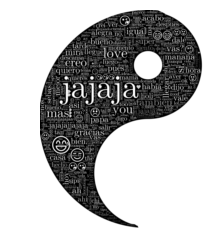

In [12]:
# Display the generated image:
fig, ax = plt.subplots()

plt.imshow(wa_inverted, cmap='gray', interpolation='bilinear')
plt.axis("off")
plt.savefig("laura.png", dpi=600, bbox_inches='tight')
plt.show()

# Juan

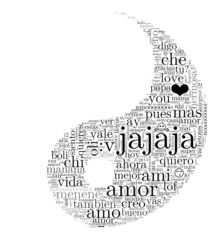

In [13]:
# Display the generated image:
fig, ax = plt.subplots()
plt.imshow(wj, interpolation='bilinear', cmap='gray')
plt.axis("off")
plt.savefig("juan.png", dpi=600, bbox_inches='tight')
plt.show()

In [63]:
song_text = song.replace('\n', ' ').lower()
song_freq = get_frequency_dict(song_text, replace_ja=False, decode=True)

In [68]:
wordcloud_kwargs = {
    'font_path': 'afanan/afanan.ttf',
    'background_color': "white",
    'max_words': 1000,
    'min_font_size': 12,
    'mode': 'RGB',
    'random_state': 14,
    'prefer_horizontal': 0.9, 
}

wordcloud_song = WordCloud(mask=HEART, **wordcloud_kwargs).generate_from_frequencies(song_freq)
image_colors = ImageColorGenerator(HEART)
wordcloud_song = wordcloud_song.recolor(color_func=image_colors)

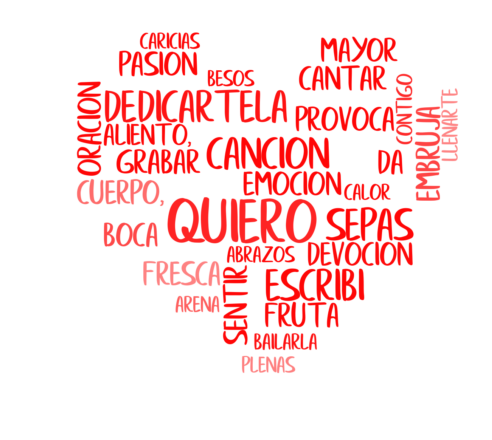

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(wordcloud_song, interpolation='bilinear')
ax.set_axis_off()

fig.savefig("song.png", dpi=600, bbox_inches='tight')